In [13]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% end of housekeeping

# Weak-Strong Titrations 

If you start with 0.01 M acetic acid (pKa=4.75) the initial pH will be 3.38 (solved in class).  As you add strong base the pH will increase.  Neutralizing the acid in this way is called titration.  At any point during the titration the charge balance must be satisfied ...

$[\mathrm{H}^+]+[\mathrm{Na}^+]=[\mathrm{OH}^-]+[\mathrm{Ac}^-]$

Using K$_w$ and K$_a$ (alpha expression) we can write this in terms of H+ and $Ac_T$

$[\mathrm{H}^+]+[\mathrm{Na}^+]=\dfrac{K_w}{[\mathrm{H}^+]}+\dfrac{Ac_TK_a}{[\mathrm{H}^+]+K_a}$

We can assume that the concentration of the added base is high enough that we can ignore dilution so $Ac_T$ = 0.01 M, for the entire titration (if we knew the volumes we could calculate the exact concentration of this strong acid anion, but I am trying to keep the calculations simple and illustrate the principles of titration and buffering, and electroneutrality).  

So with total acetate and Ka known we have just two variables, the sodium concentration and the proton concentration.  If we set one variable we have one equation and one unknown and we can solve it.  To make a graph of the pH versus added sodium it is actually easier to fix pH ($[\mathrm{H}^+]$) and solve for $[\mathrm{Na}^+]$. So by rearranging the electroneutrality we can write 

$[\mathrm{Na}^+]=\dfrac{K_w}{[\mathrm{H}^+]}+\dfrac{Ac_TK_a}{[\mathrm{H}^+]+K_a}-[\mathrm{H}^+]$

In the code below we'll do this calculation and plot the titration curve

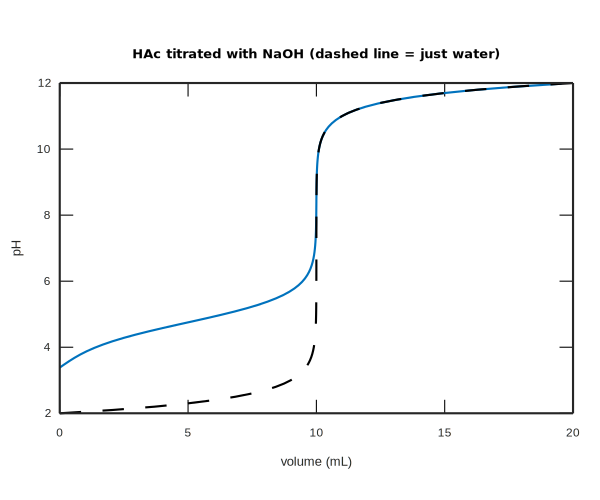

In [14]:
%plot -s 600,500 -f 'svg'
Kw=1e-14; pH=3.38:0.1:12; H=10.^-pH; OH=Kw./H; AcT=0.01; Ka=10^-4.75;
Na=OH+(AcT*Ka)./(Ka+H)-H; vol=1000*((Na*0.1)/0.1); 
plot(vol,pH,'linewidth',2); xlabel('volume (mL)'); ylabel('pH')
set(gca,'fontsize',11,'linewidth',2)
title('HAc titrated with NaOH (dashed line = just water)')
axis([0 20 2 12])

% add strong strong for comparison
pHs=2:0.1:12; Hs=10.^-pHs; OHs=Kw./Hs; Nas=OHs+AcT-Hs; vols=1000*((Nas*0.1)/0.1); 
hold on; plot(vols,pHs,'k--','linewidth',2)

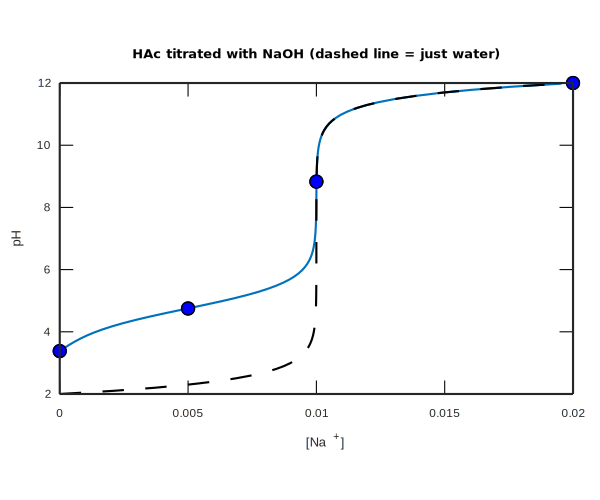

In [15]:
%plot -s 600,500 -f 'svg'
Kw=1e-14; pH=3.38:0.1:12; H=10.^-pH; OH=Kw./H; AcT=0.01; Ka=10^-4.75;
Na=OH+(AcT*Ka)./(Ka+H)-H;
plot(Na,pH,'linewidth',2); xlabel('[Na^+]'); ylabel('pH')
set(gca,'fontsize',11,'linewidth',2)
title('HAc titrated with NaOH (dashed line = just water)')
axis([0 0.02 2 12])

% add strong strong for comparison
pHs=2:0.1:12; Hs=10.^-pHs; OHs=Kw./Hs; Nas=OHs+AcT-Hs; 
hold on; plot(Nas,pHs,'k--','linewidth',2)

% add in our four points for a "sketch"

pHs=[3.38 4.75 8.83 12]; Nas=[0 0.005 0.01 0.02];
plot(Nas,pHs,'ko','markersize',4,'markerfacecolor','b')

